In [1]:
import networkx as nx
import dwavebinarycsp
import itertools
import neal
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import pandas as pd

import re
from qiskit.quantum_info import SparsePauliOp, Pauli
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import PauliEvolutionGate
from scipy.optimize import minimize
from qiskit_aer import AerSimulator

from qiskit.visualization import plot_histogram, plot_bloch_multivector

/tmp/ipykernel_572/2235888808.py:2: DeprecationWarning: dwavebinarycsp is deprecated and will be removed in Ocean 10. For solving problems with constraints, we recommend using the hybrid solvers in the Leap service. You can find documentation for the hybrid solvers at https://docs.ocean.dwavesys.com.
  import dwavebinarycsp


In [2]:
r = 1
g = 2
b = 3
w = 4

E = [(1,'r','g'),(1,'r','w'),(1,'b','w'),(2,'r','b'),(2,'b','w'),(2,'w','g'),(3,'g','r'),(3,'g','w'),(3,'b','b'),(4,'r','r'),(4,'r','b'),(4,'w','g')]

In [3]:
csp1 = dwavebinarycsp.ConstraintSatisfactionProblem(dwavebinarycsp.BINARY)
csp2 = dwavebinarycsp.ConstraintSatisfactionProblem(dwavebinarycsp.BINARY)
csp3 = dwavebinarycsp.ConstraintSatisfactionProblem(dwavebinarycsp.BINARY)

In [4]:
#one hot constraint
any_one_edge = {(0, 0, 1), (0, 1, 0), (1, 0, 0)}

#get aorresponding edges of each cube
cube1_edges = [item for item in E if item[0] == 1]
cube2_edges = [item for item in E if item[0] == 2]
cube3_edges = [item for item in E if item[0] == 3]
cube4_edges = [item for item in E if item[0] == 4]


#constraining cube1
variables = []
for edge in cube1_edges:
  i,c1,c2 = edge
  variables.append('c'+str(i)+str(c1)+str(c2))

print("one hot encoding"+" "+str(variables))
csp1.add_constraint(any_one_edge,variables)


#constraining cube2
variables = []
for edge in cube2_edges:
  i,c1,c2 = edge
  variables.append('c'+str(i)+str(c1)+str(c2))

print("one hot encoding"+" "+str(variables))
csp1.add_constraint(any_one_edge,variables)


#constraining cube3
variables = []
for edge in cube3_edges:
  i,c1,c2 = edge
  variables.append('c'+str(i)+str(c1)+str(c2))

print("one hot encoding"+" "+str(variables))
csp1.add_constraint(any_one_edge,variables)

#constraining cube4
variables = []
for edge in cube4_edges:
  i,c1,c2 = edge
  variables.append('c'+str(i)+str(c1)+str(c2))

print("one hot encoding"+" "+str(variables))
csp1.add_constraint(any_one_edge,variables)





####################################################### red constrints ##################################################

print("Constraint 2 for red's edges ")
print()

red_node_edges = [item for item in E if ( (item[1] == 'r' or item[2] == 'r') and not (item[1] == 'r' and item[2] == 'r') )]
red_node_loops = [item for item in E if ( (item[1] == 'r' or item[2] == 'r') and (item[1] == 'r' and item[2] == 'r') )]

num_red_node_edges = len(red_node_edges)
num_red_node_loops = len(red_node_loops)

variables = []
for edge in red_node_edges:
  i,c1,c2 = edge
  variables.append('c'+str(i)+str(c1)+str(c2))
print("edges connected to red node (except loops)"+" "+str(variables))

combinations = []
select2=[0]*(num_red_node_edges)
for i in range(num_red_node_edges):
  select2[i] = 1
  for j in range(i+1,num_red_node_edges):
    select2[j] = 1
    ii,c1,c2 = red_node_edges[i]
    ij,c1,c2 = red_node_edges[j]
    if (ii != ij):
      combinations.append(tuple(select2))
    select2[j] =0
  select2[i] = 0

print("allowed combinations:")
print(combinations)

csp2.add_constraint(combinations,variables)

########################################

print()

variables2 = []
for edge in red_node_loops:
  i,c1,c2 = edge
  variables2.append('c'+str(i)+str(c1)+str(c2))
  # csp2.add_constraint([0], 'c'+str(i)+str(c1)+str(c2))
print("Loop edges"+" "+str(variables2))


combinations = []
select1=[0]*(num_red_node_loops)

for i in range(num_red_node_loops):
  select1[i] = 0
  combinations.append(tuple(select1))
  select1[i] = 0

print("forcing them to 0")
print(combinations)
if (num_red_node_loops != 0):
  csp3.add_constraint(combinations,variables2)

print()
print()

##########################################################################################




####################################################### green constrints ##################################################

print("Constraint 2 for green's edges ")
print()

green_node_edges = [item for item in E if ( (item[1] == 'g' or item[2] == 'g') and not (item[1] == 'g' and item[2] == 'g') )]
green_node_loops = [item for item in E if ( (item[1] == 'g' or item[2] == 'g') and (item[1] == 'g' and item[2] == 'g') )]

num_green_node_edges = len(green_node_edges)
num_green_node_loops = len(green_node_loops)

variables = []
for edge in green_node_edges:
  i,c1,c2 = edge
  variables.append('c'+str(i)+str(c1)+str(c2))

print("edges connected to green node (except loops)"+" "+str(variables))

combinations = []
select2=[0]*(num_green_node_edges)
for i in range(num_green_node_edges):
  select2[i] = 1
  for j in range(i+1,num_green_node_edges):
    select2[j] = 1
    ii,c1,c2 = green_node_edges[i]
    ij,c1,c2 = green_node_edges[j]
    if (ii != ij):
      combinations.append(tuple(select2))

    select2[j] =0
  select2[i] = 0

print("allowed combinations:")
print(combinations)

csp2.add_constraint(combinations,variables)

########################################

print()

variables2 = []
for edge in green_node_loops:
  i,c1,c2 = edge
  variables2.append('c'+str(i)+str(c1)+str(c2))
  # csp2.add_constraint([0], 'c'+str(i)+str(c1)+str(c2))

print("Loop edges"+" "+str(variables2))



combinations = []
select1=[0]*(num_green_node_loops)

for i in range(num_green_node_loops):
  select1[i] = 0
  combinations.append(tuple(select1))
  select1[i] = 0


print("forcing them to 0")
if (num_green_node_loops != 0):
  csp3.add_constraint(combinations,variables2)

print()

##########################################################################################




####################################################### blue constrints ##################################################

print("Constraint 2 for blue's edges ")
print()

blue_node_edges = [item for item in E if ( (item[1] == 'b' or item[2] == 'b') and not (item[1] == 'b' and item[2] == 'b') )]
blue_node_loops = [item for item in E if ( (item[1] == 'b' or item[2] == 'b') and (item[1] == 'b' and item[2] == 'b') )]

num_blue_node_edges = len(blue_node_edges)
num_blue_node_loops = len(blue_node_loops)

variables = []
for edge in blue_node_edges:
  i,c1,c2 = edge
  variables.append('c'+str(i)+str(c1)+str(c2))

print("edges connected to blue node (except loops)"+" "+str(variables))

combinations = []
select2=[0]*(num_blue_node_edges)
for i in range(num_blue_node_edges):
  select2[i] = 1
  for j in range(i+1,num_blue_node_edges):
    select2[j] = 1
    ii,c1,c2 = blue_node_edges[i]
    ij,c1,c2 = blue_node_edges[j]
    if (ii != ij):
      combinations.append(tuple(select2))
    select2[j] =0
  select2[i] = 0

print("allowed combinations:")
print(combinations)

csp2.add_constraint(combinations,variables)

########################################

print()

variables2 = []
for edge in blue_node_loops:
  i,c1,c2 = edge
  variables2.append('c'+str(i)+str(c1)+str(c2))

print("Loop edges"+" "+str(variables2))

combinations = []
select1=[0]*(num_blue_node_loops)

for i in range(num_blue_node_loops):
  select1[i] = 0
  combinations.append(tuple(select1))
  select1[i] = 0

print("forcing them to 0")

if (num_blue_node_loops != 0):
  csp3.add_constraint(combinations,variables2)

print()

##########################################################################################

####################################################### white constrints ##################################################

print("Constraint 2 for white's edges ")
print()

white_node_edges = [item for item in E if ( (item[1] == 'w' or item[2] == 'w') and not (item[1] == 'w' and item[2] == 'w') )]
white_node_loops = [item for item in E if ( (item[1] == 'w' or item[2] == 'w') and (item[1] == 'w' and item[2] == 'w') )]

num_white_node_edges = len(white_node_edges)
num_white_node_loops = len(white_node_loops)

variables = []
for edge in white_node_edges:
  i,c1,c2 = edge
  variables.append('c'+str(i)+str(c1)+str(c2))

print("edges connected to white node (except loops)"+" "+str(variables))

combinations = []
select2=[0]*(num_white_node_edges)
for i in range(num_white_node_edges):
  select2[i] = 1
  for j in range(i+1,num_white_node_edges):
    select2[j] = 1
    ii,c1,c2 = white_node_edges[i]
    ij,c1,c2 = white_node_edges[j]
    if (ii != ij):
      combinations.append(tuple(select2))
    select2[j] =0
  select2[i] = 0

print("allowed combinations:")
print(combinations)

csp2.add_constraint(combinations,variables)

########################################

variables2 = []
for edge in white_node_loops:
  i,c1,c2 = edge
  variables2.append('c'+str(i)+str(c1)+str(c2))
  # csp2.add_constraint([0], 'c'+str(i)+str(c1)+str(c2))

print("Loop edges"+" "+str(variables2))

combinations = []
select1=[0]*(num_white_node_loops)

for i in range(num_white_node_loops):
  select1[i] = 0
  combinations.append(tuple(select1))
  select1[i] = 0

print("forcing them to 0")

if (num_white_node_loops != 0):
  csp3.add_constraint(combinations,variables2)

print()

##########################################################################################


one hot encoding ['c1rg', 'c1rw', 'c1bw']
one hot encoding ['c2rb', 'c2bw', 'c2wg']
one hot encoding ['c3gr', 'c3gw', 'c3bb']
one hot encoding ['c4rr', 'c4rb', 'c4wg']
Constraint 2 for red's edges 

edges connected to red node (except loops) ['c1rg', 'c1rw', 'c2rb', 'c3gr', 'c4rb']
allowed combinations:
[(1, 0, 1, 0, 0), (1, 0, 0, 1, 0), (1, 0, 0, 0, 1), (0, 1, 1, 0, 0), (0, 1, 0, 1, 0), (0, 1, 0, 0, 1), (0, 0, 1, 1, 0), (0, 0, 1, 0, 1), (0, 0, 0, 1, 1)]

Loop edges ['c4rr']
forcing them to 0
[(0,)]


Constraint 2 for green's edges 

edges connected to green node (except loops) ['c1rg', 'c2wg', 'c3gr', 'c3gw', 'c4wg']
allowed combinations:
[(1, 1, 0, 0, 0), (1, 0, 1, 0, 0), (1, 0, 0, 1, 0), (1, 0, 0, 0, 1), (0, 1, 1, 0, 0), (0, 1, 0, 1, 0), (0, 1, 0, 0, 1), (0, 0, 1, 0, 1), (0, 0, 0, 1, 1)]

Loop edges []
forcing them to 0

Constraint 2 for blue's edges 

edges connected to blue node (except loops) ['c1bw', 'c2rb', 'c2bw', 'c4rb']
allowed combinations:
[(1, 1, 0, 0), (1, 0, 1, 0), (1, 

In [5]:
bqm_rule1 = dwavebinarycsp.stitch(csp1 )
bqm_rule2 = dwavebinarycsp.stitch(csp2 )
bqm_rule3 = dwavebinarycsp.stitch(csp3 )


bqm = bqm_rule1 + bqm_rule2 + bqm_rule3

In [6]:
Q, offset_qubo = bqm.to_qubo()

def relabel_qubo_keys_to_int(Q):
    """
    Take Q={(u,v): coeff} where u,v may be ints or strings like 'x0'
    Returns:
        Q2 with integer indices
        mapping dict
    """
    mapping = {}
    next_index = 0

    def get_index(var):
        nonlocal next_index
        if var not in mapping:
            # if label like "x7" extract the number
            if isinstance(var, str) and var.startswith("x"):
                try:
                    num = int(var[1:])
                except:
                    num = next_index
                    next_index += 1
                    mapping[var] = num
                    return num
                mapping[var] = num
                return num
            # string digit
            if isinstance(var, str) and var.isdigit():
                mapping[var] = int(var)
                return int(var)
            # pure integer
            if isinstance(var, int):
                mapping[var] = var
                return var
            # fallback: assign new
            mapping[var] = next_index
            next_index += 1
            return mapping[var]
        return mapping[var]

    Q2 = {}
    for (u, v), coeff in Q.items():
        ui = get_index(u)
        vi = get_index(v)
        Q2[(ui, vi)] = coeff

    return Q2, mapping


Q_int, mapping = relabel_qubo_keys_to_int(Q)

from qiskit.quantum_info import SparsePauliOp, Pauli
import numpy as np


def qubo_to_sparse_pauli_op(qubo_dict):

    pauli_terms = []
    coefficients = []

    max_index = max(max(pair) for pair in qubo_dict) + 1

    for (i, j), value in qubo_dict.items():
        if i == j:
            z_term = ['I'] * max_index
            z_term[i] = 'Z'
            pauli_terms.append("".join(z_term))
            coefficients.append(value / 2)
        else:
            z_term = ['I'] * max_index
            z_term[i] = 'Z'
            z_term[j] = 'Z'
            pauli_terms.append("".join(z_term))
            coefficients.append(value / 4)

    sparse_pauli_op = SparsePauliOp.from_list(list(zip(pauli_terms, coefficients)))

    return sparse_pauli_op

sparse_pauli_op = qubo_to_sparse_pauli_op(Q_int)
print(sparse_pauli_op)

cost_hamiltonian = sparse_pauli_op
cost_hamiltonian

SparsePauliOp(['ZZIIIIIIIIIIIIII', 'IZZIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIII', 'IZIZIIIIIIIIIIII', 'ZIIZIIIIIIIIIIII', 'IIZZIIIIIIIIIIII', 'ZIIIZIIIIIIIIIII', 'IIZIZIIIIIIIIIII', 'IIIZZIIIIIIIIIII', 'IZIIIZIIIIIIIIII', 'ZIIIIZIIIIIIIIII', 'IIZIIZIIIIIIIIII', 'IIIZIZIIIIIIIIII', 'IIIIZZIIIIIIIIII', 'IZIIIIZIIIIIIIII', 'ZIIIIIZIIIIIIIII', 'IIIZIIZIIIIIIIII', 'IIIIIZZIIIIIIIII', 'IZIIIIIZIIIIIIII', 'ZIIIIIIZIIIIIIII', 'IIZIIIIZIIIIIIII', 'IIIIZIIZIIIIIIII', 'IIIIIZIZIIIIIIII', 'IIIIIIZZIIIIIIII', 'IIIIIIZIZIIIIIII', 'IIIIIIIZZIIIIIII', 'IZIIIIIIIZIIIIII', 'ZIIIIIIIIZIIIIII', 'IIZIIIIIIZIIIIII', 'IIIZIIIIIZIIIIII', 'IIIIZIIIIZIIIIII', 'IIIIIIZIIZIIIIII', 'IIIIIIIIIZZIIIII', 'IZIIIIIIIIIZIIII', 'ZIIIIIIIIIIZIIII', 'IIZIIIIIIIIZIIII', 'IIIIZIIIIIIZIIII', 'IIIIIZIIIIIZIIII', 'IIIIIIZIIIIZIIII', 'IIIIIIIZIIIZIIII', 'IIIIIIIIIIZZIIII', 'IIIIIIIIIZIZIIII', 'IZIIIIIIIIIIZIII', 'ZIIIIIIIIIIIZIII', 'IIIZIIIIIIIIZIII', 'IIIIIIZIIIIIZIII', 'IIIIIIIIIZIIZIII', 'IZIIIIIIIIIIIZII', 'IIIIIZIIIIIIIZII', 'IIII

SparsePauliOp(['ZZIIIIIIIIIIIIII', 'IZZIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIII', 'IZIZIIIIIIIIIIII', 'ZIIZIIIIIIIIIIII', 'IIZZIIIIIIIIIIII', 'ZIIIZIIIIIIIIIII', 'IIZIZIIIIIIIIIII', 'IIIZZIIIIIIIIIII', 'IZIIIZIIIIIIIIII', 'ZIIIIZIIIIIIIIII', 'IIZIIZIIIIIIIIII', 'IIIZIZIIIIIIIIII', 'IIIIZZIIIIIIIIII', 'IZIIIIZIIIIIIIII', 'ZIIIIIZIIIIIIIII', 'IIIZIIZIIIIIIIII', 'IIIIIZZIIIIIIIII', 'IZIIIIIZIIIIIIII', 'ZIIIIIIZIIIIIIII', 'IIZIIIIZIIIIIIII', 'IIIIZIIZIIIIIIII', 'IIIIIZIZIIIIIIII', 'IIIIIIZZIIIIIIII', 'IIIIIIZIZIIIIIII', 'IIIIIIIZZIIIIIII', 'IZIIIIIIIZIIIIII', 'ZIIIIIIIIZIIIIII', 'IIZIIIIIIZIIIIII', 'IIIZIIIIIZIIIIII', 'IIIIZIIIIZIIIIII', 'IIIIIIZIIZIIIIII', 'IIIIIIIIIZZIIIII', 'IZIIIIIIIIIZIIII', 'ZIIIIIIIIIIZIIII', 'IIZIIIIIIIIZIIII', 'IIIIZIIIIIIZIIII', 'IIIIIZIIIIIZIIII', 'IIIIIIZIIIIZIIII', 'IIIIIIIZIIIZIIII', 'IIIIIIIIIIZZIIII', 'IIIIIIIIIZIZIIII', 'IZIIIIIIIIIIZIII', 'ZIIIIIIIIIIIZIII', 'IIIZIIIIIIIIZIII', 'IIIIIIZIIIIIZIII', 'IIIIIIIIIZIIZIII', 'IZIIIIIIIIIIIZII', 'IIIIIZIIIIIIIZII', 'IIII

# QAOA Functions

In [7]:


def create_qaoa_circ(theta):

  n_qubits = 16
  qc = QuantumCircuit(n_qubits,12)
  n_layers = len(theta)//2

  beta = theta[:n_layers]
  gamma = theta[n_layers:]

  qc.h(range(n_qubits))
  qc.barrier()

  for i in range(n_layers):
    qc.append(PauliEvolutionGate(cost_hamiltonian, time=gamma[i]), range(n_qubits))
    qc.barrier()

    for j in range(n_qubits):
      qc.rx(2 * beta[i], j)
    qc.barrier()
  qc.measure(range(12),range(12))

  return qc



def get_expectation( shots=512):
    backend = AerSimulator()

    def execute_circ(theta):
        qc = create_qaoa_circ(theta)
        # Transpile to be safe
        qc_transpiled = transpile(qc, backend)
        counts = backend.run(qc_transpiled, seed_simulator=10, nshots=shots).result().get_counts()
        return compute_expectation(counts)

    return execute_circ



def compute_expectation(counts):
      total = 0
      # sum_counts = 0
      total_shots = sum(counts.values())
      for bitstring, count in counts.items():
        obj = 0
        # print(type(bitstring))
        sample_values_as_ints = [int(bit) for bit in bitstring]
        sample = dict(zip(bqm.variables, sample_values_as_ints))
        sample['aux0'] = 1
        sample['aux1'] = 0
        sample['aux2'] =1
        sample['aux3'] = 1
        # total += bqm.energy(sample)

        for i, constraint in enumerate(csp1.constraints):
          passed = constraint.check(sample)
          if (not passed):
            total += 30*bqm_rule1.energy(sample)

        for i, constraint in enumerate(csp2.constraints):
          passed = constraint.check(sample)
          if (not passed):
            total += 13*bqm_rule2.energy(sample)

        for i, constraint in enumerate(csp3.constraints):
          passed = constraint.check(sample)
          if (not passed):
            total += 25*bqm_rule3.energy(sample)

      all_total_E.append(total/total_shots)
    
      return total/total_shots

In [8]:
p = 1


expectation = get_expectation(1000)
initial_params = np.random.uniform(low=0, high=2 * np.pi, size= 2* p)

all_total_E = []
res = minimize(expectation, x0= initial_params ,method='COBYLA')

num_params = 2 * p
expectation = get_expectation(1000)

# start from where COBYLA left off
initial_params = res.x

res = minimize(
    expectation,
    x0=initial_params,
    method="Nelder-Mead",
)

res


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 725.8515625
             x: [ 2.447e+00  1.668e+00]
           nit: 40
          nfev: 91
 final_simplex: (array([[ 2.447e+00,  1.668e+00],
                       [ 2.447e+00,  1.668e+00],
                       [ 2.447e+00,  1.668e+00]]), array([ 7.259e+02,  7.259e+02,  7.259e+02]))

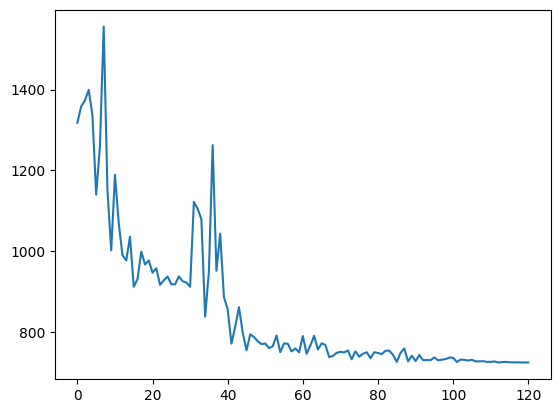

In [9]:
step = 1
x = range(len(all_total_E))
x_small = x[::step]
y_small = all_total_E[::step]

plt.plot(x_small, y_small)
plt.show()

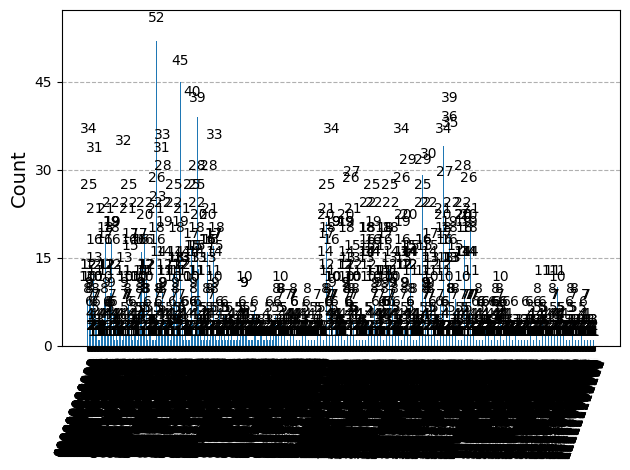

In [10]:
backend = AerSimulator()

qc_res = QuantumCircuit(16, 12)
qc_res = create_qaoa_circ(res.x)
qc_res_decomposed = transpile(qc_res, backend) 

results = backend.run(qc_res_decomposed, seed_simulator=10, shots=10000).result()
counts = results.get_counts()
plot_histogram(counts)

In [11]:

top_n = 20000  #basically check all

count_items = list(counts.items())
sorted_counts = sorted(count_items, key=lambda x: x[1], reverse = True)
top_n_answers = sorted_counts[:top_n]


print("Correct outcomes")
for outcome, count in top_n_answers:
    
    not_all_pass = 0
    bit_values = [int(bit) for bit in outcome]

    # Reconstruct the sample dictionary that maps variable names to their values
    sample = dict(zip(bqm.variables, bit_values))

    for i, constraint in enumerate(csp1.constraints):
        # A Constraint object has its own check method
        passed = constraint.check(sample)
        if (not passed):
          not_all_pass =1

    for i, constraint in enumerate(csp2.constraints):
        # A Constraint object has its own check method
        passed = constraint.check(sample)
        if (not passed):
          not_all_pass =1

    for i, constraint in enumerate(csp3.constraints):
        # A Constraint object has its own check method
        passed = constraint.check(sample)
        if (not passed):
          not_all_pass =1


    if (not not_all_pass):
      print(f"  Outcome: '{outcome}', Count: {count}")
      print(sample)



Correct outcomes
  Outcome: '001100100001', Count: 14
{'c1rg': 0, 'c1rw': 0, 'c1bw': 1, 'c2rb': 1, 'c2bw': 0, 'c2wg': 0, 'c3gr': 1, 'c3gw': 0, 'c3bb': 0, 'c4rr': 0, 'c4rb': 0, 'c4wg': 1}
  Outcome: '100010010010', Count: 5
{'c1rg': 1, 'c1rw': 0, 'c1bw': 0, 'c2rb': 0, 'c2bw': 1, 'c2wg': 0, 'c3gr': 0, 'c3gw': 1, 'c3bb': 0, 'c4rr': 0, 'c4rb': 1, 'c4wg': 0}
  Outcome: '001001100010', Count: 4
{'c1rg': 0, 'c1rw': 0, 'c1bw': 1, 'c2rb': 0, 'c2bw': 0, 'c2wg': 1, 'c3gr': 1, 'c3gw': 0, 'c3bb': 0, 'c4rr': 0, 'c4rb': 1, 'c4wg': 0}


# Lets run this on a QPU

In [12]:
from qbraid import QbraidProvider
provider = QbraidProvider()

In [13]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
# magic word for producing visualizations in notebook
%matplotlib inline
import string
import time

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
from braket.devices import LocalSimulator
from braket.aws import AwsDevice, AwsQuantumTask

Available Devics

In [14]:
devices = provider.get_devices()
for device in devices:
    print(device)

QbraidDevice('aws_sv1')
QbraidDevice('aws_tn1')
QbraidDevice('quera_aquila')
QbraidDevice('aws_dm1')
QbraidDevice('qbraid_qir_simulator')
QbraidDevice('iqm_garnet')
QbraidDevice('ionq_simulator')
QbraidDevice('rigetti_ankaa_3')
QbraidDevice('iqm_emerald')


/home/jovyan/.qbraid/environments/work_i1992g/pyenv/lib/python3.11/site-packages/qbraid/runtime/native/provider.py:155: RuntimeWarning: The default runtime configuration for device 'qbraid_qir_simulator' includes transpilation to program type 'pyqir', which is not registered.
  warnings.warn(


In [15]:
def get_expectation_rigetti(rigetti_device, shots=500):
    """
    Returns a function that executes the QAOA circuit on the specified QbraidDevice 
    (e.g., Rigetti) and returns the expectation value.
    """
    # The device object is the backend
    rigetti = provider.get_device(rigetti_device)
    backend = rigetti

    def execute_circ(theta):
        qc = create_qaoa_circ(theta)
        
        print(f"Submitting job with theta={theta}...")

        rigetti_task = backend.run(qc, shots=shots) 
        
        counts = rigetti_task.result().data.get_counts() 
        
        exp_val = compute_expectation(counts)
        print(f"  > Job finished. Expectation Value: {exp_val:.4f}")
        return exp_val

    return execute_circ

In [16]:
p = 1

expectation = get_expectation_rigetti("aws_sv1")
initial_params = np.random.uniform(low=0, high=2 * np.pi, size= 2* p)
all_total_E = []

res = minimize(expectation, x0= initial_params ,method='COBYLA')

num_params = 2 * p
expectation = get_expectation_rigetti("aws_sv1")

print("COBYLA DONE - STARTING NELDER")

# start from where COBYLA left off
initial_params = res.x

res = minimize(
    expectation,
    x0=initial_params,
    method="Nelder-Mead",
)

res


Submitting job with theta=[1.213 4.341]...
  > Job finished. Expectation Value: 1616.6760
Submitting job with theta=[2.213 4.341]...
  > Job finished. Expectation Value: 1487.7200
Submitting job with theta=[2.213 5.341]...
  > Job finished. Expectation Value: 1583.1160
Submitting job with theta=[3.017 3.746]...
  > Job finished. Expectation Value: 1617.0600
Submitting job with theta=[1.751 4.15 ]...
  > Job finished. Expectation Value: 1493.9200
Submitting job with theta=[2.334 4.122]...
  > Job finished. Expectation Value: 1503.0560
Submitting job with theta=[2.257 4.365]...
  > Job finished. Expectation Value: 1390.6080
Submitting job with theta=[2.343 4.416]...
  > Job finished. Expectation Value: 1600.3040
Submitting job with theta=[2.232 4.408]...
  > Job finished. Expectation Value: 1439.9760
Submitting job with theta=[2.201 4.282]...
  > Job finished. Expectation Value: 1449.7520
Submitting job with theta=[2.306 4.356]...
  > Job finished. Expectation Value: 1501.3280
Submitting

KeyboardInterrupt: 

In [17]:
res.x

array([2.25723317, 4.36511956])

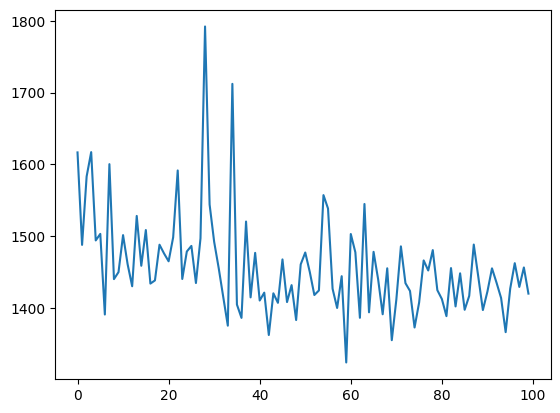

In [18]:
step = 1
x = range(len(all_total_E))
x_small = x[::step]
y_small = all_total_E[::step]

plt.plot(x_small, y_small)
plt.show()

# AWS SV1 machine

from qbraid import QbraidProvider

provider = QbraidProvider()

In [ ]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
# magic word for producing visualizations in notebook
%matplotlib inline
import string
import time

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
from braket.devices import LocalSimulator
from braket.aws import AwsDevice, AwsQuantumTask

In [ ]:
devices = provider.get_devices()
for device in devices:
    print(device)

QbraidDevice('aws_sv1')
QbraidDevice('aws_tn1')
QbraidDevice('quera_aquila')
QbraidDevice('aws_dm1')
QbraidDevice('qbraid_qir_simulator')
QbraidDevice('iqm_garnet')
QbraidDevice('ionq_simulator')
QbraidDevice('rigetti_ankaa_3')
QbraidDevice('iqm_emerald')


In [ ]:

# rigetti = provider.get_device("rigetti_ankaa_3")

def get_expectation( shots=512):
    backend = AerSimulator()

    def execute_circ(theta):
        qc = create_qaoa_circ(theta)
        # Transpile to be safe
        qc_transpiled = transpile(qc, backend)
        counts = backend.run(qc_transpiled, seed_simulator=10, nshots=shots).result().get_counts()
        return compute_expectation(counts)

    return execute_circ

In [ ]:
def get_expectation_rigetti(rigetti_device, shots=500):
    """
    Returns a function that executes the QAOA circuit on the specified QbraidDevice 
    (e.g., Rigetti) and returns the expectation value.
    """
    # The device object is the backend
    rigetti = provider.get_device(rigetti_device)
    backend = rigetti

    def execute_circ(theta):
        qc = create_qaoa_circ(theta)
        
        print(f"Submitting job with theta={np.round(theta, 3)}...")

        # Run the circuit on the QPU. This submits the job asynchronously.
        # Ensure the device is available before running this cell.
        rigetti_task = backend.run(qc, shots=shots) 
        
        # NOTE: The .result() call BLOCKS the notebook until the QPU job is finished.
        # This can take minutes or hours depending on the queue time.
        counts = rigetti_task.result().measurement_counts() 
        
        # Calculate the expectation value from the measurement results
        exp_val = compute_expectation(counts)
        print(f"  > Job finished. Expectation Value: {exp_val:.4f}")
        return exp_val

    return execute_circ

In [ ]:
p = 1

# num_params = 2 * p
# bounds = [(0, 2 * np.pi)] * num_params

expectation = get_expectation_rigetti("aws_sv1")
initial_params = np.random.uniform(low=0, high=2 * np.pi, size= 2* p)

all_total_E = []
res = minimize(expectation, x0= initial_params ,method='COBYLA')

res

Submitting job with theta=[4.869 1.167]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 14775.0000
Submitting job with theta=[5.869 1.167]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 13167.0000
Submitting job with theta=[5.869 2.167]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 13305.0000
Submitting job with theta=[6.865 1.081]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 19445.0000
Submitting job with theta=[5.369 1.156]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 13243.0000
Submitting job with theta=[6.055 1.001]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 14111.0000
Submitting job with theta=[5.902 1.204]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 13866.0000
Submitting job with theta=[5.785 1.112]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 12752.0000
Submitting job with theta=[5.685 1.113]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 12952.0000
Submitting job with theta=[5.803 1.014]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 12783.0000
Submitting job with theta=[5.832 1.128]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 12882.0000
Submitting job with theta=[5.781 1.124]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 12577.0000
Submitting job with theta=[5.769 1.146]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 12647.0000
Submitting job with theta=[5.777 1.121]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 12932.0000
Submitting job with theta=[5.79  1.128]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 12838.0000
Submitting job with theta=[5.783 1.119]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 13149.0000
Submitting job with theta=[5.775 1.132]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 13229.0000
Submitting job with theta=[5.782 1.119]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 12692.0000
Submitting job with theta=[5.779 1.125]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 12872.0000
Submitting job with theta=[5.781 1.124]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 12970.0000
Submitting job with theta=[5.781 1.123]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 12886.0000
Submitting job with theta=[5.781 1.124]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 12731.0000
Submitting job with theta=[5.78  1.125]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 13028.0000
Submitting job with theta=[5.781 1.124]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 12982.0000
Submitting job with theta=[5.781 1.124]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 13059.0000
Submitting job with theta=[5.781 1.124]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 12629.0000
Submitting job with theta=[5.781 1.124]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 12523.0000
Submitting job with theta=[5.781 1.124]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 13098.0000
Submitting job with theta=[5.781 1.124]...


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


  > Job finished. Expectation Value: 13256.0000
Submitting job with theta=[5.781 1.124]...
  > Job finished. Expectation Value: 12819.0000


/tmp/ipykernel_3616/3279070817.py:21: DeprecationWarning: Call to deprecated function measurement_counts. Use 'Result.data.get_counts()' instead.
  counts = rigetti_task.result().measurement_counts()


 message: Return from COBYLA because the trust region radius reaches its lower bound.
 success: True
  status: 0
     fun: 12523.0
       x: [ 5.781e+00  1.124e+00]
    nfev: 30
   maxcv: 0.0

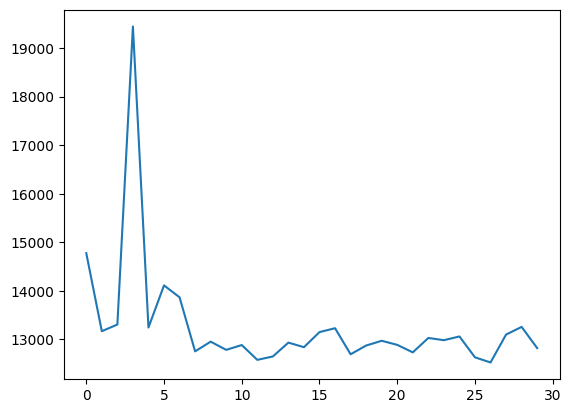

In [ ]:
step = 1
x = range(len(all_total_E))
x_small = x[::step]
y_small = all_total_E[::step]

plt.plot(x_small, y_small)
plt.show()

In [ ]:
print(res)

 message: Return from COBYLA because the trust region radius reaches its lower bound.
 success: True
  status: 0
     fun: 12523.0
       x: [ 5.781e+00  1.124e+00]
    nfev: 30
   maxcv: 0.0


In [ ]:
backend = provider.get_device("aws_sv1")

# Decompose the circuit to basic gates before running
qc_res = QuantumCircuit(16, 16)
qc_res = create_qaoa_circ(res.x)
# qc_res_decomposed = transpile(qc_res, backend)  # This decomposes PauliEvolution

# results = backend.run(qc_res_decomposed, seed_simulator=10, shots=100).result()
rigetti_task = backend.run(qc_res, shots=1000) 
        


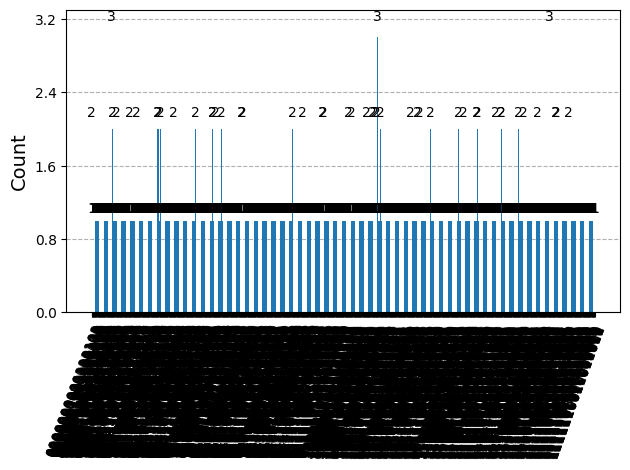

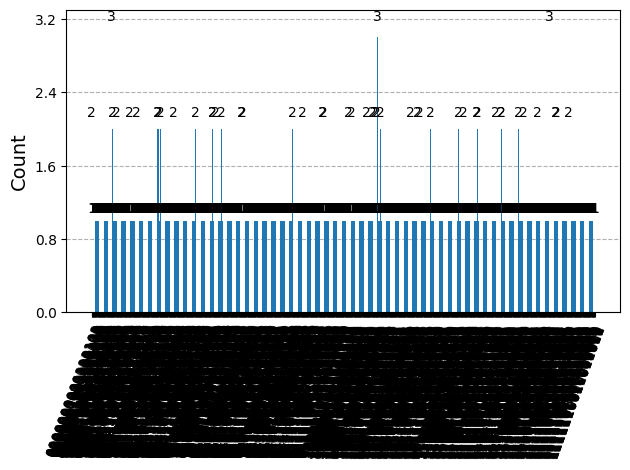

In [ ]:
counts = rigetti_task.result().data.get_counts() 
plot_histogram(counts)

In [ ]:

top_n = 20000  # The number of highest-count answers you want

count_items = list(counts.items())


sorted_counts = sorted(count_items, key=lambda x: x[1], reverse = True)


top_n_answers = sorted_counts[:top_n]

# 4. Print the result
print("Correct outcomes")
for outcome, count in top_n_answers:
    # Print the outcome (e.g., '000') and its frequency

    not_all_pass = 0

    # print(type(outcome))
    bit_values = [int(bit) for bit in outcome]
    # print(type(bit_values))

    # Reconstruct the sample dictionary that maps variable names to their values
    sample = dict(zip(bqm.variables, bit_values))



    for i, constraint in enumerate(csp1.constraints):
        # A Constraint object has its own check method
        passed = constraint.check(sample)
        if (not passed):
          not_all_pass =1

    for i, constraint in enumerate(csp2.constraints):
        # A Constraint object has its own check method
        passed = constraint.check(sample)
        if (not passed):
          not_all_pass =1

    for i, constraint in enumerate(csp3.constraints):
        # A Constraint object has its own check method
        passed = constraint.check(sample)
        if (not passed):
          not_all_pass =1


    if (not not_all_pass):
      print(f"  Outcome: '{outcome}', Count: {count}")
      print(sample)



Correct outcomes
  Outcome: '0011001000010111', Count: 1
{'c1rg': 0, 'c1rw': 0, 'c1bw': 1, 'c2rb': 1, 'c2bw': 0, 'c2wg': 0, 'c3gr': 1, 'c3gw': 0, 'c3bb': 0, 'c4rr': 0, 'c4rb': 0, 'c4wg': 1, 'aux0': 0, 'aux1': 1, 'aux2': 1, 'aux3': 1}
  Outcome: '0011001000011010', Count: 1
{'c1rg': 0, 'c1rw': 0, 'c1bw': 1, 'c2rb': 1, 'c2bw': 0, 'c2wg': 0, 'c3gr': 1, 'c3gw': 0, 'c3bb': 0, 'c4rr': 0, 'c4rb': 0, 'c4wg': 1, 'aux0': 1, 'aux1': 0, 'aux2': 1, 'aux3': 0}
